In [3]:
# Step 1: Load & Preprocess SMS Spam Data using NLP techniques (TF-IDF)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("SMSSpamCollection[2]", sep='\t', header=None, names=['label', 'message'])

# Encode labels: 'ham' = 0, 'spam' = 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# TF-IDF Vectorization (remove stop words, convert to lowercase)
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Output shape of the TF-IDF vectors
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (4457, 7441)
Test shape: (1115, 7441)


In [4]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Accuracy: 0.9785

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



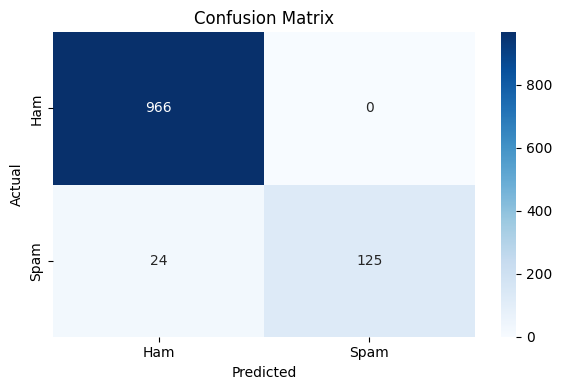

In [5]:
# Step 2: Train a Naive Bayes model and evaluate its performance

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()


In [6]:
# Step 3: Use the trained model to classify new SMS messages

def predict_spam(message):
    message_tfidf = tfidf.transform([message])
    prediction = model.predict(message_tfidf)[0]
    return "Spam" if prediction == 1 else "Ham"

# Example predictions
test_messages = [
    "Win a free iPhone now!!! Click here to claim.",
    "Hey, are we still meeting at 6?",
    "Congratulations! You've won a $1000 Walmart gift card.",
    "Can you send me the meeting notes?"
]

for msg in test_messages:
    print(f"Message: {msg}")
    print(f"Prediction: {predict_spam(msg)}\n")


Message: Win a free iPhone now!!! Click here to claim.
Prediction: Spam

Message: Hey, are we still meeting at 6?
Prediction: Ham

Message: Congratulations! You've won a $1000 Walmart gift card.
Prediction: Ham

Message: Can you send me the meeting notes?
Prediction: Ham

